In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from chainer.iterators import MultiprocessIterator, SerialIterator
import cProfile
import pstats
import numpy as np

In [2]:
def convert_to_keras_batch(iter):
    while True:
        batch = iter.__next__() # type: List[Tuple[np.ndarray, np.ndarray]]
        xs = [x for (x, _) in batch] # type: List[np.ndarray]
        ys = [y for (_, y) in batch] # type: List[np.ndarray]
        _xs = np.array(xs) # (n, 480, 360, 3)
        _ys = np.array(ys) # (n, 480, 360, n_classes)
        yield (_xs, _ys)

In [10]:
from mscoco import get_iter as get_coco
train, valid = get_coco((512, 512), dice_coef=True, workdir="/data/***/")

loading annotations into memory...
Done (t=24.18s)
creating index...
index created!
loading annotations into memory...
Done (t=6.62s)
creating index...
index created!


In [11]:
train_iter = convert_to_keras_batch(
        SerialIterator(
            train,
            batch_size=1,
        )
)

In [12]:
'''
cProfile.run("train_iter.__next__()", filename="main.prof")
pstats.Stats("main.prof").strip_dirs().sort_stats("cumulative").print_stats()
'''

'\ncProfile.run("train_iter.__next__()", filename="main.prof")\npstats.Stats("main.prof").strip_dirs().sort_stats("cumulative").print_stats()\n'

In [13]:
a, b= train_iter.__next__()
(a.shape, b.shape)

((1, 512, 512, 3), (1, 512, 512))

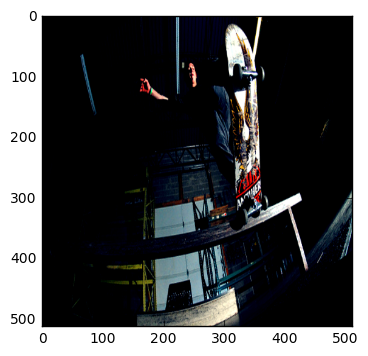

In [14]:
plt.imshow(a[0])

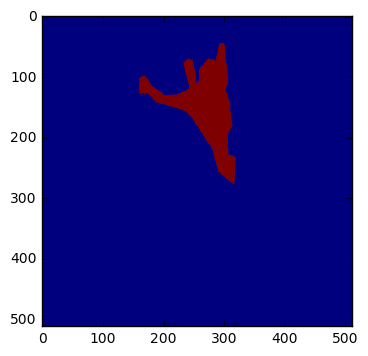

In [15]:
#plt.imshow(b[0][:,:,0])
plt.imshow(b[0])

((1, 512, 512, 3), (1, 512, 512))